In [7]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz-10.0.1-win64/bin/'

import sys
sys.path.append('../algorithms/')

from CSOWP_SR import *
from ExpressionTree import *
from utils import *

import pandas as pd
import numpy as np
import pickle
import re
import sympy as smp

In [8]:
data = create_all_data("Cluster_outputs")
data

,nodes,adj,optimization,problem,index,MSE,training_time(s),solution_string,expression
0,"[*, abs, x, cos, +, x, x]","[[1, 3], [2], [], [4], [5, 6], [], []]",NoOpt,damped_pendulum,0,1.641978,3756.940420,(abs(x)*cos((x+x))),e^{-x/10}*3cos(2x)
1,"[tan, cos, +, x, x]","[[1], [2], [3, 4], [], []]",NoOpt,damped_pendulum,1,2.071246,2441.154894,tan(cos((x+x))),e^{-x/10}*3cos(2x)
2,"[/, cos, +, x, x, abs, tan, 0.558]","[[1, 5], [2], [3, 4], [], [], [6], [7], []]",NoOpt,damped_pendulum,2,1.696498,2398.762961,(cos((x+x))/abs(tan(0.558))),e^{-x/10}*3cos(2x)
3,"[/, cos, +, x, x, cos, +, 0.333, sin, 0.942]","[[1, 5], [2], [3, 4], [], [], [6], [7, 8], [],...",NoOpt,damped_pendulum_specific,0,0.744125,4283.866576,(cos((x+x))/cos((0.333+sin(0.942)))),e^{-x/10}*3cos(2x)
4,"[-, *, cos, +, x, x, +, 0.777, 0.952, 0.902]","[[1, 9], [2, 6], [3], [4, 5], [], [], [7, 8], ...",NoOpt,damped_pendulum_specific,1,2.138995,4099.071350,((cos((x+x))*(0.777+0.952))-0.902),e^{-x/10}*3cos(2x)
...,...,...,...,...,...,...,...,...,...
58,"[abs, square, -, abs, x, x]","[[1], [2], [3, 5], [4], [], []]",NoOpt,radioactive_decay,1,78.266624,3092.152919,abs(((abs(x)-x))**2),10e^{-0.5x}
59,"[+, exp-, x, cube, +, 0.939, sqrt, /, x, x]","[[1, 3], [2], [], [4], [5, 6], [], [7], [8, 9]...",NoOpt,radioactive_decay,2,91.845796,2290.001081,(exp(-x)+((0.939+sqrt((x/x))))**3),10e^{-0.5x}
60,"[+, 0.837, +, exp-, x, exp, /, 0.772, 0.375]","[[1, 2], [], [3, 5], [4], [], [6], [7, 8], [],...",NoOpt,radioactive_decay_specific,0,88.095167,3343.818139,(0.837+(exp(-x)+exp((0.772/0.375)))),10e^{-0.5x}
61,"[+, exp, exp, exp-, 0.249, +, 0.152, exp-, x]","[[1, 5], [2], [3], [4], [], [6, 7], [], [8], []]",NoOpt,radioactive_decay_specific,1,87.764466,2062.987863,(exp(exp(exp(-0.249)))+(0.152+exp(-x))),10e^{-0.5x}


In [9]:
string = data["solution_string"][0]
string

'(abs(x)*cos((x+x)))'

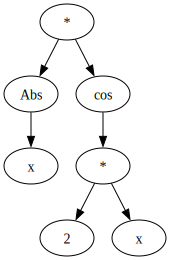

In [10]:
tree = exprToTree(string)
tree.visualize_tree()